# Swan Visualization
The first cell code will read the Swan input file, and get some basic parameters for visualization.
Please execute the below code firstly, then you could generate plots separately. 

In [4]:
import numpy as np
#from buoy import Buoytable
import os

# The output directory 
opdir = os.path.join(os.environ["HOME"],"work","run_dir")

# Read INPUT file, and some basic parameter value
with open(os.path.join(opdir,'INPUT')) as input_file:
    Lines = input_file.readlines()
    for line in Lines:
        if line.startswith("$"):         
            continue
        else:
            data = line.strip().split()
            # get the location file name
            if line.startswith("POINTS"):
                buoy_loc_name = data[3].strip('\'')

            # get the output table name
            elif data[0] == "TABLE" and data[1] == "'BUOYS'":
                buoy_table_name = data[3].strip('\'')
                print(data)

            # get the dimensions of conputational grid
            elif line.startswith("CGRID"):
                y_coor = int(float(data[2]))
                x_coor = int(float(data[3]))

            # get the x y coordinate file name
            elif line.startswith("READ COOR"):
                buoy_xy_name = data[3].strip('\'')

            else:
                continue

input_file.close()

loc_list=[]
locCount = 0
# Read the location file to get locations
with open(os.path.join(opdir,buoy_loc_name)) as point_file:
    Lines = point_file.readlines()
    for line in Lines:
        data = line.strip().split()
        locCount += 1
        fname_k = "%s,%s" % (data[0],data[1])
        loc_list.append(fname_k)
point_file.close()

# get the amount of locations

# Read the output table file to get the output variables 
buoyFile = os.path.join(opdir,buoy_table_name)
print("buoyFile:",buoyFile)
with open(buoyFile) as buoyTable:
    lines = buoyTable.readlines()
    
    # [1:] delete first element '%' 
    outputVars = lines[4].split()[1:]
    varsDict = dict(zip(outputVars, range(len(outputVars))))
    
    varsUnit = lines[5].split()[1:]
    unitDict = dict(zip(varsUnit, range(len(varsUnit))))
    
    buoyValue = []
    for line in lines[7:]:
        buoyValue.append(line.split())


['TABLE', "'BUOYS'", 'HEAD', "'buoy.tab'", 'TIME', 'XP', 'YP', 'DEP', 'WIND', 'HS', 'DIR', 'RTP', 'PER', 'TM01', 'TM02', 'PDIR', 'OUT', '20120826.000000', '1', 'HR']
buoyFile: /home/sbrandt/work/run_dir/buoy.tab


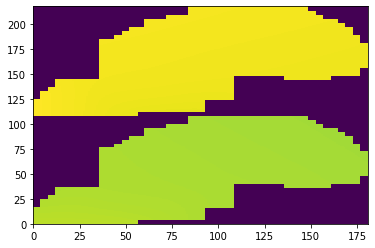

In [5]:
import matplotlib.pyplot as plt
b02file = os.path.join(opdir,"b02.xy")
if os.path.exists(b02file):
    b02 = np.genfromtxt(b02file)
    plt.pcolor(b02)

## Time Series 1D
Here you could generate time series 1D plot with output variables, including X-Windv, Y-Windv, Hsig, Dir, PkDir ...    on specific location. 
Just change the the output_var and the location index locIndex.

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



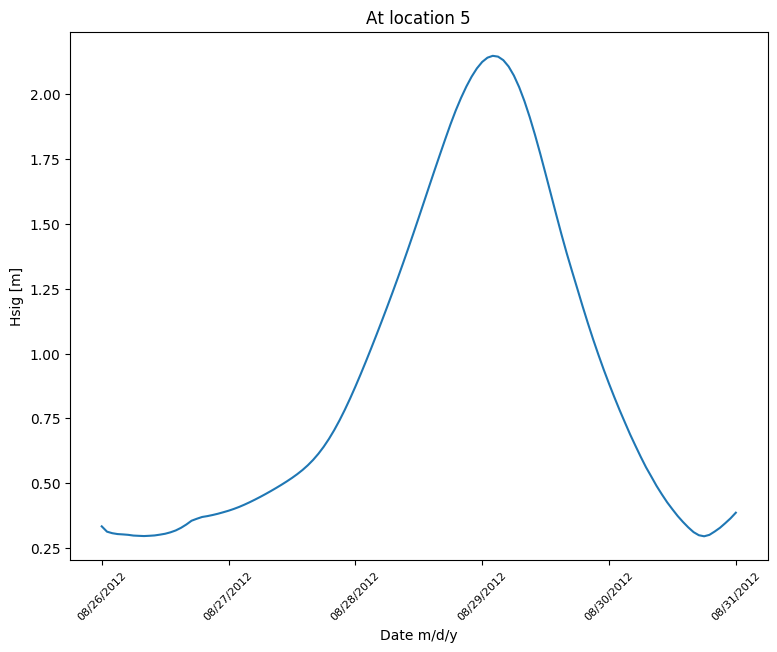

In [7]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import dates

import time
import datetime

# Set output variable to show
outputVar = "Hsig"

# Set the location 
locIndex = 5

# Get the index of output variable and location 
varIndex = varsDict.get(outputVar)
unit = varsUnit[varIndex+1]

# Draw plot
def singlePlot():
    plt.clf()
    plt.cla()
    plt.close()
    
    fig, ax = plt.subplots()
    
    X = []
    Y = []
    dt = 0
    # get the data of output variable and location
    for line in range(locIndex - 1, len(buoyValue), locCount):
    #for line in range(len(buoyValue)):
        # X is Time
        print(buoyValue)
        t = buoyValue[line][0]
        ymd = t[0:8]
        hms = t[9:15]
        dt = time.mktime(datetime.datetime.strptime(ymd + hms, '%Y%m%d%H%M%S').timetuple())
        X.append(int(dt))
        
        # Y is outputVar
        Y.append(buoyValue[line][int(varIndex)])
    
    dts = list(map(datetime.datetime.fromtimestamp, X))
    X = dates.date2num(dts)
    
    Ys = []
    for i in Y:
        Ys.append(float(i))
        
    # generate 1D plot
    ax.plot(X,Ys)
    ax.set_title("At location " + str(locIndex))
    ax.set_ylabel(outputVar+" "+unit)
    plt.xlabel("Date m/d/y")
    ax.xaxis.set_major_locator(dates.DayLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
    plt.xticks(rotation=45,fontsize=8)
    plt.rcParams['figure.figsize'] = [9, 7]
    plt.rcParams['figure.dpi'] = 100
    plt.show()    
    
    #except Exception as ex_results:
        #print ("Error: ", ex_results)
        #plt.close()

# Show plot
singlePlot()


## Wave Height 2D
Here you can generate wave height 2D contour for each time step.
Just change the time step parameter.

/home/sbrandt/work/run_dir


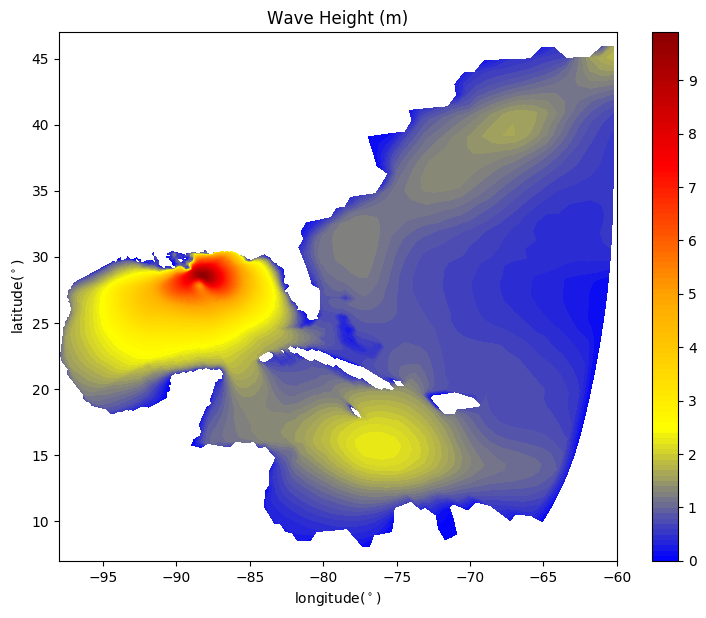

In [8]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# time step
time_step = 64

# all data lines
data = []

# time_step data lines
ts_data = []

# custom color map, have to add two or two more colors 
# Here are some example, just uncomment one of below colors

#colors=["#00FF00","#8A2BE2", "#696969"]
colors=["#0000FF", "#FFFF00",'#FFA500', "#FF0000", "#8B0000"]
#colors=["#7addf1", "#7a89f1", "#ce8ca3"]

cmap = LinearSegmentedColormap.from_list("", colors)

# load wave height file, and get the valid data


print(opdir)

with open(os.path.join(opdir,'hs')) as hs_file:
    datalines = hs_file.readlines()
    for line in datalines:
        if line.startswith(" "):
            data.append(line)
hs_file.close()
#print(data)

# according to time step, and the correlated data line
time_step_line = (x_coor + 1) * (2 * time_step - 2)

# get the corralated data, write to ts_data
for idx in range(x_coor + 1):
    tmp = []

    tmp1 = data[time_step_line + idx].split()[1:]
    for i in tmp1:
        if(i == "-900."):
            i = "NaN"
        tmp.append(float(i) * 0.01)
    tmp2 = data[time_step_line + x_coor + 1 + idx].split()[1:]
    for j in tmp2:
        if(j == "-900."):
            j = "NaN"
        tmp.append(float(j) * 0.01)
    
    ts_data.append(tmp)
        
x = x_coor + 1
y = y_coor + 1

# load the longtitude and latitude of computational grid 
xy_grid = np.loadtxt(os.path.join(opdir,buoy_xy_name))
longitude = xy_grid[0:x]
for i in range(x):
    for j in range(y):
        if(longitude[i][j] == (-900.0000000000)):
            longitude[i][j] = "NaN"
latitude = xy_grid[x:2*x]
for i in range(x):
    for j in range(y):
        if(latitude[i][j] == (-900.0000000000)):
            latitude[i][j]= "NaN"

# generate contour plot 
plt.contourf(longitude, latitude, ts_data, 100, cmap = cmap)
plt.colorbar()
plt.title("Wave Height (m)")
plt.ylabel("latitude($^\circ$)")
plt.xlabel("longitude($^\circ$)")
plt.xlim(-98,-60)
plt.ylim(7,47)
plt.rcParams['figure.figsize'] = [9, 7]
plt.rcParams['figure.dpi'] = 100
plt.show()


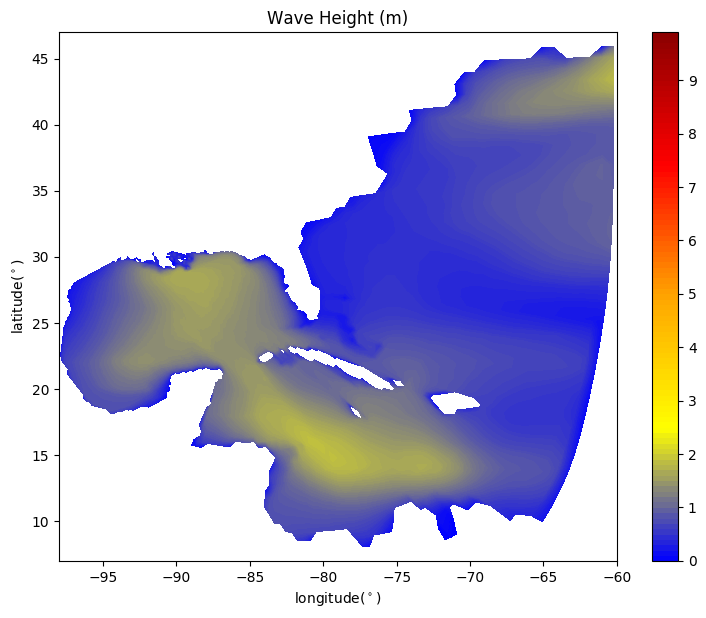

In [9]:
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import HTML

arrlist = []
for i in range(0, 121):
    time_step = i
    
    # all data lines
    data = []
    
    # time_step data lines
    ts_data = []
    
    # custom color map, have to add two or two more colors 
    # Here are some example, just uncomment one of below colors
    
    #colors=["#00FF00","#8A2BE2", "#696969"]
    colors=["#0000FF", "#FFFF00",'#FFA500', "#FF0000", "#8B0000"]
    #colors=["#7addf1", "#7a89f1", "#ce8ca3"]
    
    cmap = LinearSegmentedColormap.from_list("", colors)
    
    # load wave height file, and get the valid data
    
    
    with open(os.path.join(opdir,'hs')) as hs_file:
        datalines = hs_file.readlines()
        for line in datalines:
            if line.startswith(" "):
                data.append(line)
    hs_file.close()
    
    # according to time step, and the correlated data line
    time_step_line = (x_coor + 1) * (2 * time_step - 2)
    
    # get the corralated data, write to ts_data
    for idx in range(x_coor + 1):
        tmp = []
    
        tmp1 = data[time_step_line + idx].split()[1:]
        for i in tmp1:
            if(i == "-900."):
                i = "NaN"
            tmp.append(float(i) * 0.01)
        tmp2 = data[time_step_line + x_coor + 1 + idx].split()[1:]
        for j in tmp2:
            if(j == "-900."):
                j = "NaN"
            tmp.append(float(j) * 0.01)
        
        ts_data.append(tmp)
               
    arr = np.array(ts_data)
    arrlist.append(arr)
    arr2 = np.dstack(tuple(arrlist))
    
fps = 5
frn = 121

fig = plt.figure()

def animate(i):
    z = arr2[:,:,i]
    cont = plt.contourf(longitude, latitude, z, 100, cmap=cmap, vmin=0, vmax=11)
    return cont

plt.title("Wave Height (m)")
plt.ylabel("latitude($^\circ$)")
plt.xlabel("longitude($^\circ$)")
plt.xlim(-98,-60)
plt.ylim(7,47)
plt.colorbar(plt.contourf(longitude, latitude, arr2[:,:,64], 100, cmap=cmap))   

anim = animation.FuncAnimation(fig, animate, frames=frn)

HTML(anim.to_html5_video())